In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special, stats, integrate

In [3]:
from code.python.series import series_x_mu_b0
from code.python.series import series_x_mu_b0_pos
from code.python.series import series_x_mu_b0_pos_robust
from code.python.series import asymtotic_x_mu_b0_neg
from code.python.series import asymptotic_alpha_b0

In [223]:
alpha = 10
beta = 0
mu = 0.5
delta = 10
x = 5.5

In [224]:
x - mu

5.0

In [225]:
alpha * delta

100

In [226]:
x - mu, delta*alpha, alpha / delta

(5.0, 100, 1.0)

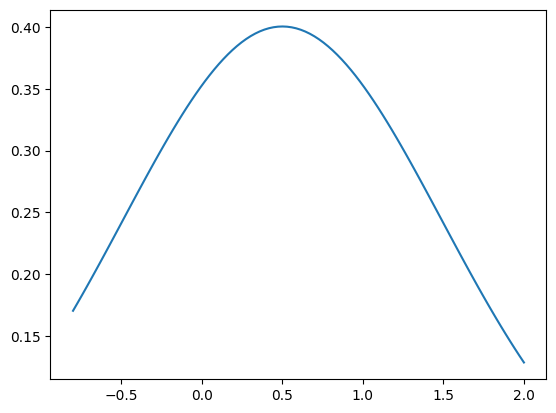

In [227]:
xx = np.linspace(-0.8, 2, 100)
plt.plot(xx, stats.norminvgauss.pdf(xx, a=alpha*delta, b=beta*delta, loc=mu, scale=delta))
plt.show()

In [228]:
stats.norminvgauss.cdf(x, a=alpha*delta, b=beta*delta, loc=mu, scale=delta)

0.9999994587460721

In [229]:
series_x_mu_b0(x, alpha, mu, delta, maxiter=200, eps=1e-16)

(0.9999994587447555, 75)

In [230]:
# %%timeit
series_x_mu_b0_pos(x, alpha, mu, delta, maxiter=300, eps=1e-16)

(0.9999994587460745, 58)

In [231]:
series_x_mu_b0_pos_robust(x, alpha, mu, delta, maxiter=10000, eps=5e-16)

(0.9999994587460737, 54)

In [232]:
R = 1
series_x_mu_b0_pos_robust(x * R, alpha / R, mu * R, delta * R, maxiter=10000, eps=1e-16)

(0.9999994587460737, 56)

In [233]:
1.0 - series_x_mu_b0_pos(-x, alpha, -mu, delta, maxiter=300, eps=1e-15)[0]

0.9999994587460743

In [234]:
asymptotic_alpha_b0(x, alpha, mu, delta, eps=1e-15)

1 1.3187322198550736e-45
2 2.6958050459619566e-52
3 2.389463563466411e-53
4 4.0368148855863664e-53
5 2.680771337714054e-54
6 6.152609434403111e-55
7 2.1707317684231883e-55
8 5.203770551253377e-56
9 1.6839537324745486e-56
10 8.96388483364606e-57
11 6.5973305513276245e-59
12 1.2790308455783714e-57
13 4.739018718833495e-58
14 1.6088177454423333e-59
15 1.073898983359234e-58
16 5.756420655056544e-59
17 8.344615074615652e-60
18 1.0297187704147306e-59
19 1.0019207743155025e-59
20 4.3927014833731666e-60
21 1.179433583511776e-61


(0.9999994587460735, 21)

In [235]:
asymtotic_x_mu_b0_neg(x, alpha, mu, delta, eps=1e-6)[0]

-1

In [214]:
aa = np.array([
4337.65080731929,
5810969.79668592,
972699524.337313,
5529274039889.426,
4613705067320761.0,
2.486706291478932e+18,
8.934409419707112e+21,
8.545811798791736e+24,
5.983612904201487e+25,
1.2588539177779772e+31,
2.117723970364492e+34,
1.8293037458490087e+37,
8.295187152185425e+38,
2.717731026352441e+43,
5.439001284669284e+46,
6.504523811379845e+49,
4.447034865831982e+52
])

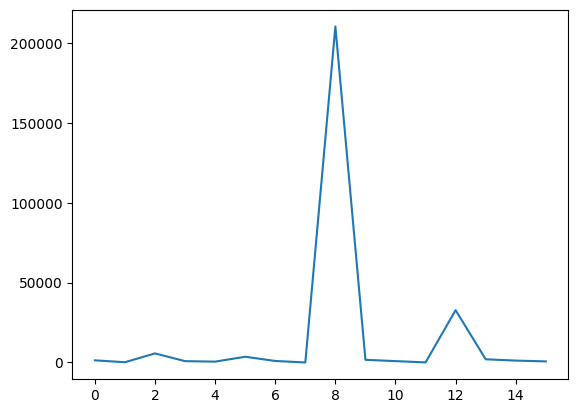

In [215]:
plt.plot(aa[1:] / aa[:-1])

In [216]:
2/((delta/alpha) * np.arange(2, 16)) - 1/((delta/alpha)**2 * np.arange(2, 16))

array([-1395.85798817,  -930.57199211,  -697.92899408,  -558.34319527,
        -465.28599606,  -398.81656805,  -348.96449704,  -310.19066404,
        -279.17159763,  -253.79236148,  -232.64299803,  -214.74738279,
        -199.40828402,  -186.11439842])

In [217]:
asymtotic_x_mu_b0_neg(x, alpha, mu, delta, eps=1e-12)

(3.189441021430949e-150, 7)

In [218]:
from mpmath import *

In [220]:
mp.dps = 150

def fun_k0(t):
    C = sqrt(2) * delta * exp(delta * alpha) / pi
    r = exp(sqrt(2) * (x - mu) * t)
    w = sqrt(2 * ((x - mu) ** 2 + delta ** 2)) * sqrt(alpha ** 2 / 2 + t** 2)
    q = besselk(0, w)
    return C * r * q

quad(fun_k0, [0, inf])

mpf('3.1894410209383309809116868011180564273597608375989897017920555482244785495058732362048833433070356347169195352790126157674793101211050449672631157904453e-150')

In [222]:
mp.dps = 200

def normcdf(x):
    return erfc(-x / sqrt(2)) / 2

def fun_phi(t):
    C = delta / sqrt(2 * pi)
    return C * normcdf((x - mu) / sqrt(t)) * t ** (-3/2) * exp(-(delta - alpha * t) ** 2 / 2 / t)

alpha = mpmathify(alpha)
mu = mpmathify(mu)
delta = mpmathify(delta)
x = mpmathify(x)

quad(fun_phi, [0, inf])

mpf('3.1894410214307572917354612201716887512551002363608468434104551682031677750282016072911838885165582215246355485627249038017124779699381433612329553861492225254451046308689328479859414075603163475490130875e-150')

In [23]:
quad(fun_phi, [0, 1])

mpf('0.8879335711934363213433171235406889063252144861124650444394924489745975903174184807888361715173345493287')

Alternative integral representation

In [ ]:
def fun_phi2(u):
    C = delta * exp(delta * alpha) / sqrt(2*pi)
    return C * 2 * normcdf((x-mu)*u) * exp(-delta**2/2 * u**2) * exp(-alpha**2/2/u**2)

quad(fun_phi2, [0, inf])

In [ ]:
mp.dps = 50

omega = sqrt(delta**2 + (x-mu)**2)

s = 0
z = (x-mu)**2 * alpha / omega

for k in range(50):
    r = z**k / fac2(2*k + 1)
    q = besselk(k+1, alpha * omega)
    s += r * q
    
print(s)
s *= (x-mu) * alpha / omega

In [ ]:
C = delta * exp(delta * alpha) / pi
s * C + 1/2

In [ ]:
b = alpha * omega

s = 0
for k in range(10):
    s += z**k * besselk(k+1, alpha * omega) / fac2(2*k + 1)
    print(s)


In [ ]:
y0 = 0
y1 = besselk(1, b)
y2 = y1 + z * besselk(2, b) / 3

y = [y0, y1, y2]

for n in range(20):
    num = -(b*z**2*y[n] -z*(-12 -14*n -4*n**2 + b*z) * y[n+1] - (3+2*n) * (5*b + 2*n*b + 4*z + 2*n*z)*y[n+2])
    den = ((3+2*n)*(5+2*n)*b)
    yn = num / den
    # print(num, den)
    y.append(yn)


In [ ]:
y[-1]

In [ ]:
C = delta * exp(delta * alpha) / pi
y[-1] * C * (x-mu) * alpha / omega + 1/2

In [ ]:
k = 11

(3 + 2*k) * ((5 + 2*k) * alpha * omega + 2*(2+k)) / ((3 + 2*k) * (5 + 2*k) * alpha * omega)

In [ ]:
k = 11
tp = ((x-mu)**2 * alpha / omega)**k / fac2(2*k + 1) * besselk(k+1, alpha * omega)

In [ ]:
k = 12
tp1 = ((x-mu)**2 * alpha / omega)**k / fac2(2*k + 1) * besselk(k+1, alpha * omega)

In [ ]:
C = abs(tp1 / tp)

In [ ]:
C

In [ ]:
k = 7
tp = ((x-mu)**2 * alpha / omega)**k / fac2(2*k + 1) * besselk(k+1, alpha * omega)
C = (x-mu)**2 * alpha / omega / (2*k + 3) *  besselk(k+2, alpha * omega) /  besselk(k+1, alpha * omega)

In [ ]:
besselk(k+2, alpha * omega)

In [ ]:
mp.gamma(k+2) * 2**(k+1) / (alpha * omega)**(k+2)

In [ ]:
1 / (alpha * omega * besseli(k+1, alpha * omega))

In [ ]:
besseli(k+1, alpha * omega), (alpha * omega / 2)**(k+1) / mp.gamma(k+2)

In [ ]:
fac2(2*k + 1) , factorial(2*k + 1) / (factorial(k) * 2**k)

In [ ]:
mp.gamma(k + 1)*2**k / fac2(2*k + 1)

In [ ]:
(factorial(k) * 2**k) ** 2 / factorial(2*k + 1) 

In [ ]:
sqrt(pi) / 2 * mp.gamma(k+1) / mp.gamma(k + 3/2)

In [ ]:
sqrt(pi) / 2 * mp.gamma(k+1) / mp.gamma(k + 1/2) / (k + 1/2)

In [ ]:
mp.gamma(k+1) / mp.gamma(k + 3/2), 1 / sqrt(k + 1/2)

In [ ]:
tp, 1/2 * sqrt(pi / (k + 1/2)) * ((x-mu) / omega) ** (2*k) / (alpha * omega)

In [ ]:
besselk(k+2, alpha * omega) /  besselk(k+1, alpha * omega)

In [ ]:
(k+2 - 1/2 + sqrt((k+2-1/2)**2 + (alpha * omega)**2)) / (alpha * omega)

In [ ]:
(k+1 + sqrt((k+1)**2 + (alpha * omega)**2)*(k+1)/k) / (alpha * omega)

In [ ]:
2*(k+1)/(alpha * omega) + alpha * omega / (2*(k+1 - 1))

In [ ]:
1 + ((k+1) + 1/2) / (alpha * omega)

In [ ]:
float(abs(tp) / (1 - C))

In [ ]:
C

In [ ]:
float(sum(((x-mu)**2 * alpha / omega)**k / fac2(2*k + 1) * besselk(k+1, alpha * omega) for k in range(11, 30)))

In [ ]:
(x-mu)**2 * alpha / omega * fac2(2*k + 1) / fac2(2*(k-1) + 1) * besselk(k+1, alpha * omega) / besselk(k, alpha * omega)

In [ ]:
 besselk(k, alpha * omega) / besselk(k+1, alpha * omega) * fac2(2*(k-1) + 1) / fac2(2*k + 1)

In [ ]:
special.erfc(-(x-mu)/np.sqrt(2)/np.sqrt(delta/alpha))

In [ ]:
mp.dps = 100

def fun_k1(t):
    C = alpha * delta / pi
    r = sqrt(delta ** 2 + (t - mu) ** 2)
    return C * besselk(1, alpha * r) / r * exp(delta * alpha)

print(quad(fun_k1, [-inf, x]))

mp.dps = 50

Expansion

In [ ]:
mp.dps = 50

In [ ]:
b = delta / alpha
a = (x-mu) / sqrt(2)

In [ ]:
y0 = 1/2 * erfc(-a / sqrt(b))
y1 = -1/2 * a * exp(-a**2 / b) / sqrt(pi) / b ** (3/2)

yy = [y0, y1]
N = 10

yy = [1, 1]
a=0
b=1

for n in range(0, N):
    yn = ((n + 1) * yy[n+1] * (2*a**2 - 4*b*n - 3*b) - (2*n**2 + n) * yy[n]) / (2*b**2 * (n+1) * (n+2))
    yy.append(yn)

In [ ]:
yy

In [ ]:
b

In [ ]:
normcdf((x-mu)/sqrt(b)), normcdf((x-mu)/sqrt(b/2))

In [ ]:
abs(float(yy[1]*27/24 / b**2)), abs(float(yy[2]))

In [ ]:
abs(float(yy[1]*65/64 / b**3)), abs(float(yy[3]))

In [ ]:
for k in range(len(yy)):
    bound = yy[1] / b **k
    print(k, abs(float(yy[k])), abs(float(bound)), float(yy[k] / bound))

In [ ]:
z = alpha ** 2 / 2
l = -1/2
xi = b * z

In [ ]:
Q = [2 * xi ** l * besselk(l, 2 * xi), 0, 2 * xi ** (l + 2) * (-besselk(l, 2 * xi) + besselk(l+2, 2 * xi))]

for k in range(1, N):
    qn = (k + l + 1 - 2 * xi) * Q[k+1] + xi * (2 * k + l + 1) * Q[k] + k * xi ** 2 * Q[k-1]
    Q.append(qn)

In [ ]:
s = 0
for k in range(N):
    s += yy[k] * Q[k] / z ** k

s * z **(-l) * delta * exp(delta * alpha) / sqrt(2 * pi)